In [2]:
import pickle
import numpy as np
from scipy.spatial import distance
from joblib import load
from sklearn.metrics.pairwise import cosine_similarity
import pandas as pd
from matplotlib import pyplot as plt

# Load data

In [3]:
# validation set questions and corresponding FAQs
data_prefix='../../data/12-08-'
with open(data_prefix + 'val-test.pkl', "rb") as fp:
    test_dic = pickle.load(fp) 

In [5]:
# unlabelled data
# load data:
with open("../../code/embedding/models/doc_data/all_docs_sep.pkl", "rb") as fp:
    all_docs_sep = pickle.load(fp)

faq_ans = all_docs_sep['faq_ans']
ticket_ques = all_docs_sep['ticket_ques']
ticket_ans = all_docs_sep['ticket_ans']

In [7]:
# quick put together of validation set answers
labelled_data = pd.read_csv('../../data/validate.csv')
all_path = '../../data/12-04-ticket_dat.csv'
x_all = pd.read_csv(all_path)
x_val_ind = list(labelled_data.ticket_id)
x_val_ans = np.asarray(x_all.loc[x_all['ticket_id'].isin(x_val_ind)].sort_values("ticket_id")["answer"])

# Question to FAQ similarity

In [10]:
TFiDF_ques = load('../../code/embedding/models/TF-IFD-ticket-ques.joblib')
# make matrix
FAQ_matrix_ques = TFiDF_ques.transform(faq_ans)
ticket_matrix_ques = TFiDF_ques.transform(ticket_ques)
# similarities
sim_matrix_ques = cosine_similarity(FAQ_matrix_ques, ticket_matrix_ques)
# Using Closest FAQ similarity as a measure 
strength_FAQ_ticket_ques = np.max(sim_matrix_ques, axis=0)

In [15]:
val_matrix_ques = TFiDF_ques.transform(test_dic["x_val"])
#
test_dic["y_val"][test_dic["y_val"]==199]=-1
val_pos_ques = val_matrix_ques[test_dic["y_val"]!=-1,:]
val_neg_ques = val_matrix_ques[test_dic["y_val"]==-1,:]
val_neg_ques.shape, val_pos_ques.shape
#
sFT_val_pos_ques = np.max(cosine_similarity(FAQ_matrix_ques, val_pos_ques), axis=0)
sFT_val_neg_ques = np.max(cosine_similarity(FAQ_matrix_ques, val_neg_ques), axis=0)

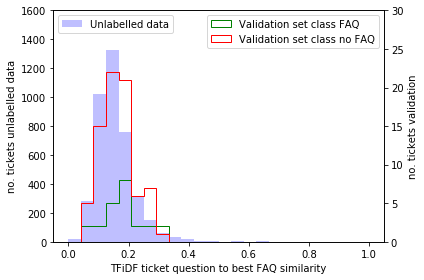

In [16]:
fig, ax1 = plt.subplots()
bins =  np.linspace(0, 1,25)
ax1.hist(strength_FAQ_ticket_ques, bins,alpha=.25, label="Unlabelled data", color="blue")
ax1.set_xlabel('TFiDF ticket question to best FAQ similarity')
ax1.set_ylabel('no. tickets unlabelled data')
plt.ylim(top=1600) 
ax2 = ax1.twinx()
ax2.hist(sFT_val_pos_ques, bins,alpha=1, label="Validation set class FAQ", color = "green", histtype ="step")
ax2.hist(sFT_val_neg_ques, bins,alpha=1, label="Validation set class no FAQ", color = "red", histtype ="step")
ax2.set_ylabel('no. tickets validation')
plt.ylim(top=30) 
fig.tight_layout()
ax1.legend(loc=2)
ax2.legend()
plt.show()

# Question to FAQ similarity

In [20]:
TFiDF_ans = load('../../code/embedding/models/TF-IFD-ans.joblib')
FAQ_matrix_ans = TFiDF_ans.transform(faq_ans)
ticket_matrix_ans = TFiDF_ans.transform(ticket_ans)
sim_matrix_ans = cosine_similarity(FAQ_matrix_ans, ticket_matrix_ans)
strength_FAQ_ticket_max_ans = np.max(sim_matrix_ans, axis=0)

In [18]:
val_matrix_ans = TFiDF_ans.transform(x_val_ans)
val_pos_ans = val_matrix_ans[test_dic["y_val"]!=-1,:]
val_neg_ans = val_matrix_ans[test_dic["y_val"]==-1,:]
sFT_val_pos_ans = np.max(cosine_similarity(FAQ_matrix_ans, val_pos_ans), axis=0)
sFT_val_neg_ans = np.max(cosine_similarity(FAQ_matrix_ans, val_neg_ans), axis=0)

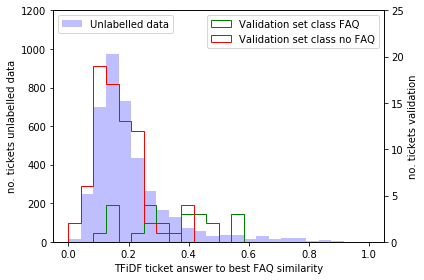

In [22]:
fig, ax1 = plt.subplots()
bins =  np.linspace(0, 1,25)
ax1.hist(strength_FAQ_ticket_max_ans, bins,alpha=.25, label="Unlabelled data", color="blue")
ax1.set_xlabel('TFiDF ticket answer to best FAQ similarity')
ax1.set_ylabel('no. tickets unlabelled data')
plt.ylim(top=1200) 
ax2 = ax1.twinx()
ax2.hist(sFT_val_pos_ans, bins,alpha=1, label="Validation set class FAQ", color = "green", histtype ="step")
ax2.hist(sFT_val_neg_ans, bins,alpha=1, label="Validation set class no FAQ", color = "red", histtype ="step")
ax2.set_ylabel('no. tickets validation')
plt.ylim(top=25) 
fig.tight_layout()
ax1.legend(loc=2)
ax2.legend()
plt.show()